In [1]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt
path = '../../CodePass2/runs/'
path = "D:/"
with h5py.File(path + '/finale_normal.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]


In [10]:

start_x = positions[0, :, 0]
start_y = positions[0,:,1]
start_z = positions[0,:,2]


array([23.192186  , 23.77515   , 27.73888   , ...,  0.73882675,
       35.94445   ,  2.631998  ], dtype=float32)

In [114]:
yz

array([19.905617, 21.692953, 19.14608 , ..., 23.25019 , 23.302685,
       20.713764], dtype=float32)

In [115]:
is_inside = np.zeros_like(start_x, dtype=bool)

yz = np.sqrt(start_y**2 + start_z**2)

is_inside[yz < 20] = True

In [116]:
sum(is_inside)

1863

In [3]:
gb_left = np.logical_and(properties == 1, x[0,:,1] < 0)

(-76.01607761383056, 58.47767505645752, -25.64211187362671, 25.65928373336792)

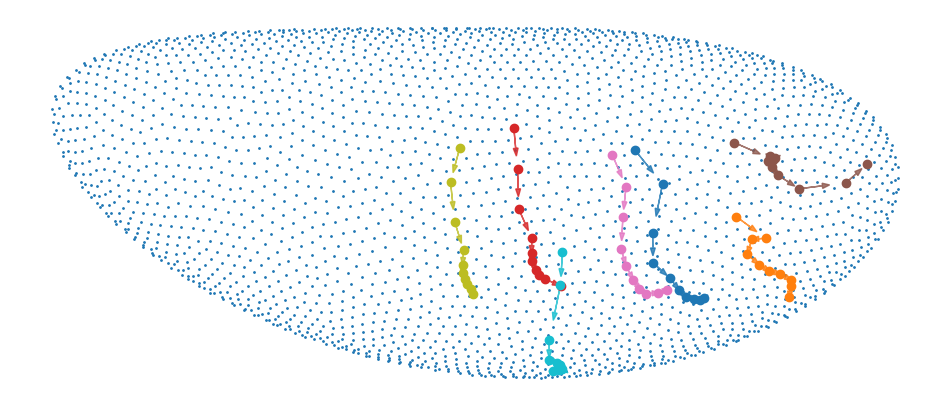

In [21]:
# make 10 time steps
ts = np.linspace(1,positions.shape[0]-1, 10,).astype(int)

# get 5 random particles in gb
gb_particles = np.where(gb_left)[0]
gb_particles = np.random.choice(gb_particles, 5)
best_gb = [3367, 4537, 498, 1994, 1735, 2856, 567]

y = positions[0,:,1]

plt.figure(figsize=(12,5))
plt.scatter(positions[0,:,0][y < 0], positions[0,:,2][y < 0], s = 1)

# plt.show()
# make 7 distinct colors

from matplotlib import cm
cols = cm.tab10(np.linspace(0,1,7))

# for t in ts:
    # plt.figure(figsize=(10,5))
    # plt.scatter(x[t,:,0][y < 0], x[t,:,2][y < 0])
for i in range(len(best_gb)):
    p, c = best_gb[i], cols[i]
    plt.plot(positions[ts,p,0], positions[ts,p,2], 'o', c =c , alpha =1)
    # make an arrowfrom each point to halfway between the next point
    for j in range(len(ts)-1):
        halfway = (positions[ts[j],p] + positions[ts[j+1],p])/2
        plt.arrow(positions[ts[j],p,0], positions[ts[j],p,2], halfway[0] - positions[ts[j],p,0], halfway[2] - positions[ts[j],p,2], color = c, alpha = 0.8, head_width = 0.7)
    # plt.show()
# remove the axes
plt.axis('off')

In [122]:
ts

array([   1,  334,  667, 1000, 1333, 1667, 2000, 2333, 2666, 3000])

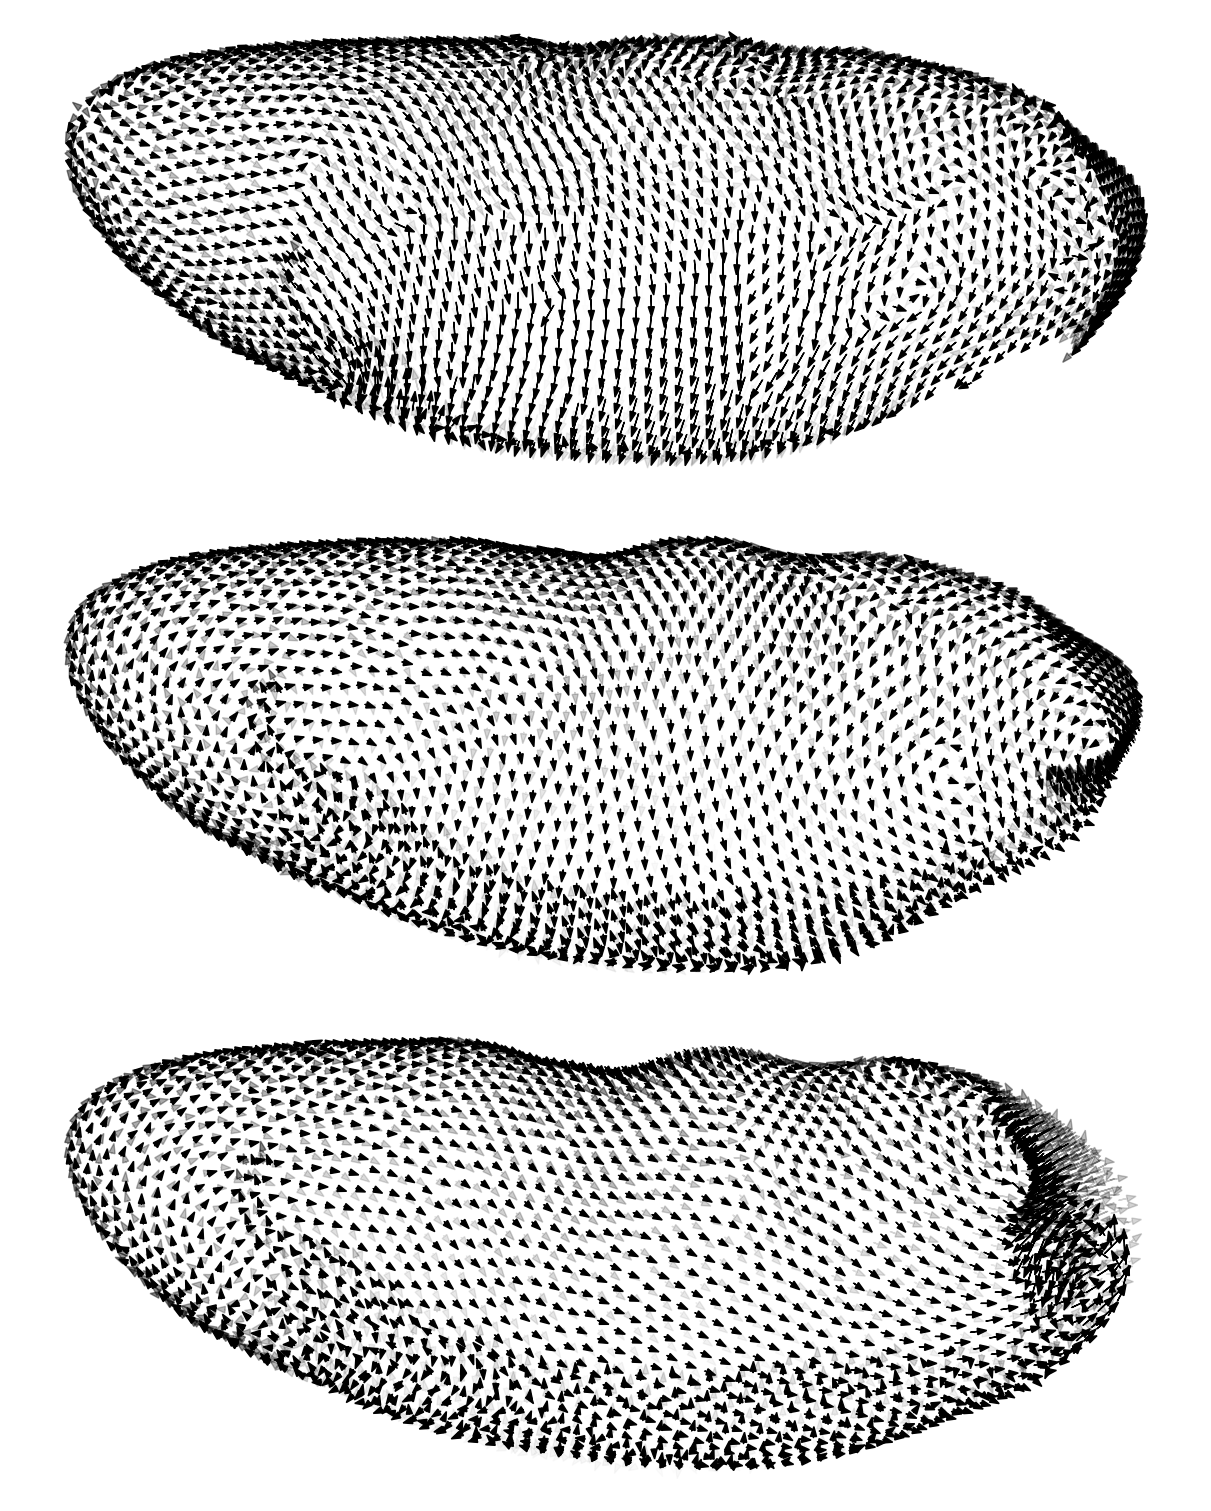

In [123]:


fig, axs = plt.subplots(3, 1, figsize=(12,3*5), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()
since = 70
axind = 0
for t in ts[2::3]:
    if t == 0:
        continue
    t -= 200
    movements_since_last = positions[t] - positions[t-since]

    xyz = np.sqrt(start_y**2 + start_z**2 + (start_x/40)**2) < 10

    # for each particle, draw an arrow showing the movement since last
    for cell in range(positions.shape[1]):
        # if not (start_y[cell] > 15 or start_z[cell]> 0):
        #     continue
        if properties[cell] == 2:
            continue
        
        yperc = (start_y[cell] - np.min(start_y))/(np.max(start_y) - np.min(start_y))
        if yperc > 0.5:
            yperc = 1.
        axs[axind].arrow(positions[t-since,cell,0], positions[t-since,cell,2], movements_since_last[cell,0], movements_since_last[cell,2], color = 'black', head_width = 0.7, alpha = yperc)
    

    # remove the axes
    axs[axind].axis('off')
    axind += 1

plt.show()

In [128]:
import pandas as pd
import numpy as np

stas = pd.read_csv('../../DeconstructingGastrulation-Data/tracked_data_rescaled.csv')

stas.head()

,Unnamed: 0.1,Unnamed: 0,x,y,z,frame,particle,dx,dy,dz
0,0,0,-4.739862,-26.555828,0.309946,1,0,NaN,NaN,NaN
1,1,1,-4.811905,-26.555293,0.320071,1,1,NaN,NaN,NaN
2,2,2,-5.964577,-26.535062,0.482068,1,2,NaN,NaN,NaN
3,3,3,-5.947833,-26.517885,2.169408,1,3,NaN,NaN,NaN
4,4,4,-6.439664,-26.571131,1.283488,1,4,NaN,NaN,NaN


In [130]:
print(positions[0].min(), stas.x.min())
print(positions[0].max(), stas.x.max())

# rotate the stas data 45 degrees around y
rot  = 0.055
stas['x_rot'] = stas.x*np.cos(rot) - stas.z*np.sin(rot)
stas['z_rot'] = stas.x*np.sin(rot) + stas.z*np.cos(rot)
stas['y_rot'] = stas.y


-69.902725 -79.21731966161327
52.40632 60.94438451825841


In [28]:
ts[::3][1:]

array([1000, 2000, 3000])

In [300]:
x.shape

(3001, 5000, 3)

IndexError: index 3800 is out of bounds for axis 0 with size 3001

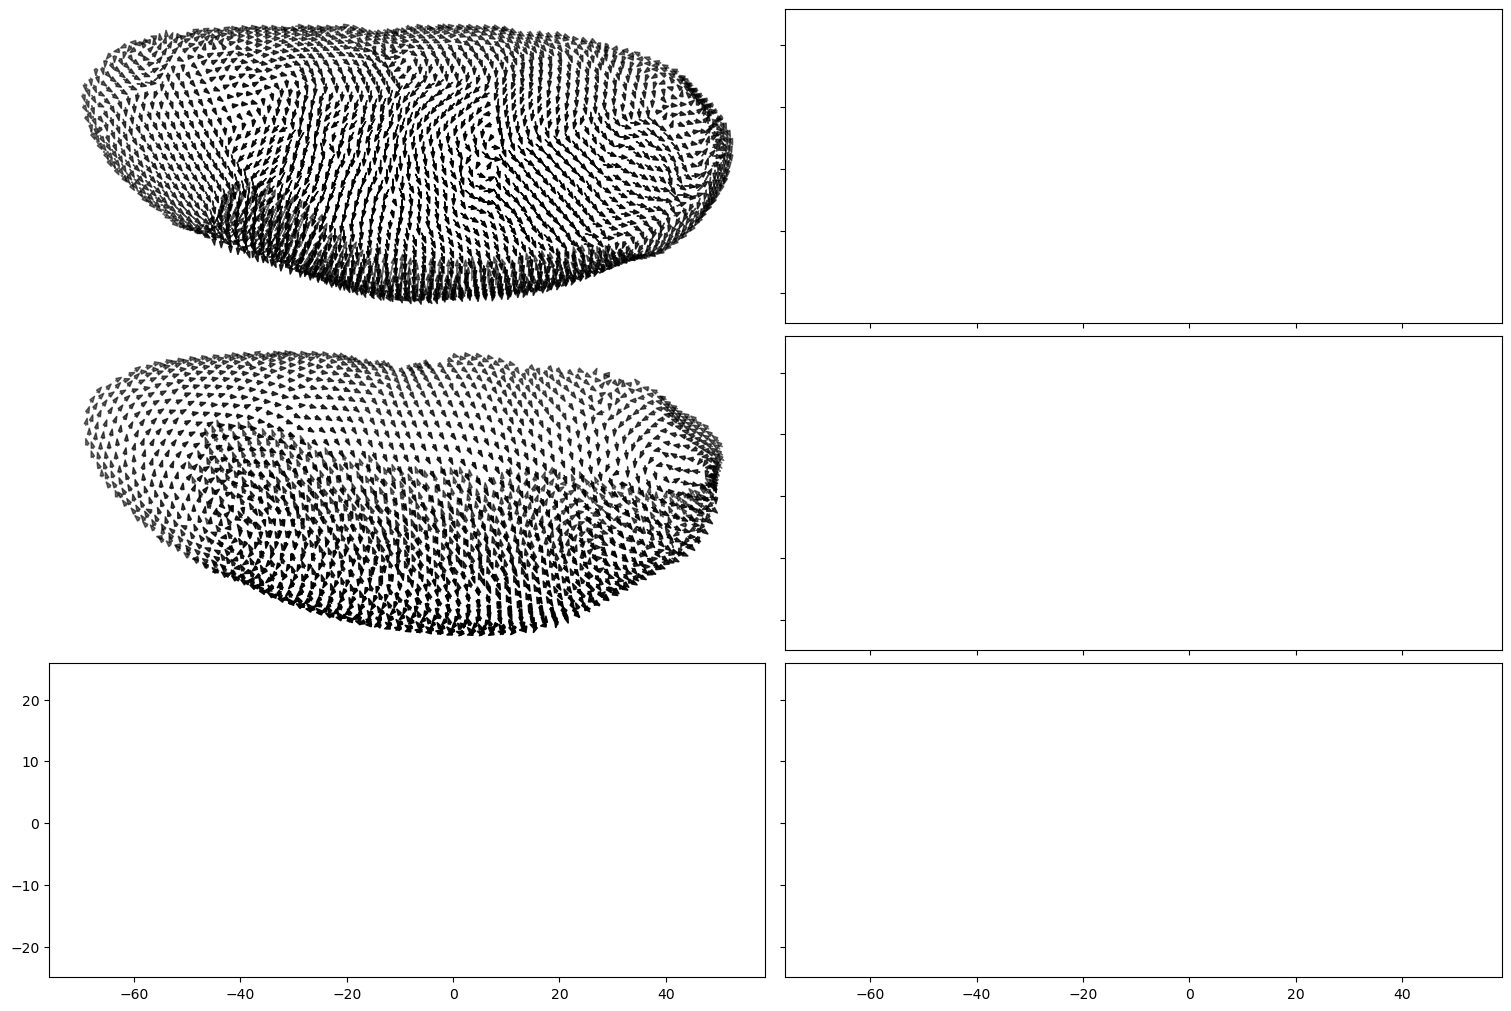

In [307]:

fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True, sharex=True, sharey=True)

axs_left = [axs[0,0], axs[1,0], axs[2,0]]
axs_right = [axs[0,1], axs[1,1], axs[2,1]]
since = 70
axind = 0


for t in [400,2000,4000]:
    if t == 0:
        continue
    t -= 200
    movements_since_last = x[t] - x[t-since]
    # for each particle, draw an arrow showing the movement since last
    for cell in range(x.shape[1]):
        if y[cell] < 2:
            continue
            
        axs_left[axind].arrow(x[t-since,cell,0], x[t-since,cell,2], movements_since_last[cell,0], movements_since_last[cell,2], color = 'black', alpha = np.minimum(np.abs(y[cell]+23.4)/(23.4*2) + 0.0, 1), head_width = 0.7)
    
    

    # remove the axes
    axs_left[axind].axis('off')
    axind += 1


axind = 0
for i in [3, 5, 10]:
    # for cell in stas[stas.frame == 10]:
    wh = stas[stas.frame == i].y < 0
    xx, zz = stas[stas.frame == i][wh].x_rot, stas[stas.frame == i][wh].z_rot
    dx, dz = stas[stas.frame == i][wh].dx, stas[stas.frame == i][wh].dz
    # normalize the vectors
    norm = np.sqrt(dx**2 + dz**2)
    dx = dx/norm*0.5
    dz = dz/norm*0.5
    for j in range(len(xx)):
        axs_right[axind].arrow(xx.iloc[j], zz.iloc[j], dx.iloc[j], dz.iloc[j], color = 'black', alpha = 1, head_width = 0.7)
    # axs_right[axind].quiver(xx, zz, dx, dz, color = 'black', alpha = 1., headwidth = 3., )
    print(len(xx))
    axs_right[axind].axis('off')
    axind += 1

plt.show()


In [3]:
# find sim movement vectors

sim_step_size = 200

sim_dirs = np.empty((positions.shape[0]-sim_step_size, positions.shape[1], 3))
sim_poss = np.empty((positions.shape[0]-sim_step_size, positions.shape[1], 3))  
for t in range(positions.shape[0]-sim_step_size):
    dir = positions[t+sim_step_size] - positions[t]
    dir = dir/np.linalg.norm(dir, axis = 1)[:,None]
    sim_dirs[t] = dir
    sim_poss[t] = positions[t]

# find the stas movement vectors
stas_dirs = -np.ones((len(np.unique(stas.frame)),11000,3))*9999
stas_poss = -np.ones((len(np.unique(stas.frame)),11000,3))*9999
for i, frame in enumerate(np.unique(stas.frame)):
    dirs = np.array([stas[stas.frame == frame].dx, stas[stas.frame == frame].dy, stas[stas.frame == frame].dz]).T

    lens = np.linalg.norm(dirs, axis = 1)
    lens[lens == 0] = 1
    dirs = dirs/lens[:,None]
    
    stas_dirs[i][:len(dirs)] = dirs

    poss = np.array([stas[stas.frame == frame].x_rot, stas[stas.frame == frame].y_rot, stas[stas.frame == frame].z_rot]).T

    stas_poss[i][:len(poss)] = poss


# Compare the data

In [304]:
stas_poss.shape

(59, 11000, 3)

In [134]:
scale = int(sim_poss.shape[0]/100)

iiis = list(range(0, 40))
overlaps = np.empty((len(iiis), len(sim_poss[0])))
avg_compared_dirs = np.empty((len(iiis), len(sim_poss[0]), 3))
for ind, iii in enumerate(iiis):

    sim_t = iii*scale
    stas_t = iii +1

    overlap = np.empty((len(sim_poss[sim_t])))
    for cell_id, (pos, dir) in enumerate(zip(sim_poss[sim_t], sim_dirs[sim_t])):
        found = False
        dist = 3
        print(f"{ind/len(iiis):.3}  -  {cell_id/len(sim_poss[sim_t]):.3}", end = "\r")
        while True:
            if dist > 50:
                print(dist, pos)

            
            
            # find the all stas particles within a certain distance
            dists = np.linalg.norm(stas_poss[stas_t] - pos, axis = 1)

            closest = np.where(dists < dist)[0]


            dirs = stas_dirs[stas_t][closest]

            # remove vector if it contains nans
            dirs = dirs[~np.isnan(dirs).any(axis=1)]
            if len(dirs) < 2:
                dist += 0.1
                continue
            
            avg_dir = np.mean(dirs, axis = 0)
            avg_compared_dirs[ind][cell_id] = avg_dir

            dot = np.dot(dir, avg_dir)

            break

               

        # find the angle between the sim dir and the stas dir
        angles = np.arccos(dot)

        overlap[cell_id] = np.mean(angles)
    overlaps[ind] = overlap

In [135]:
# save the results
np.save('overlaps_normal.npy', overlaps)
np.save('avg_compared_dirs_normal.npy', avg_compared_dirs)


In [136]:
# rech for random 
# 5000 random vectors

random_angles = np.empty((len(iiis), 5000))
for i in range(len(iiis)):
    iii = i*scale
    rand_dirs = np.random.rand(sim_dirs.shape[1], 3)*2. - 1.
    rand_dirs = rand_dirs/np.linalg.norm(rand_dirs, axis = 1)[:,None]

    dot = np.dot(sim_dirs[iii], rand_dirs.T)
    random_a = np.arccos(dot)
    random_angles[i] = np.mean(random_a, axis = 0)


C:\Users\jakob\AppData\Local\Temp\ipykernel_10752\2581003193.py:11: RuntimeWarning: invalid value encountered in arccos
  random_a = np.arccos(dot)


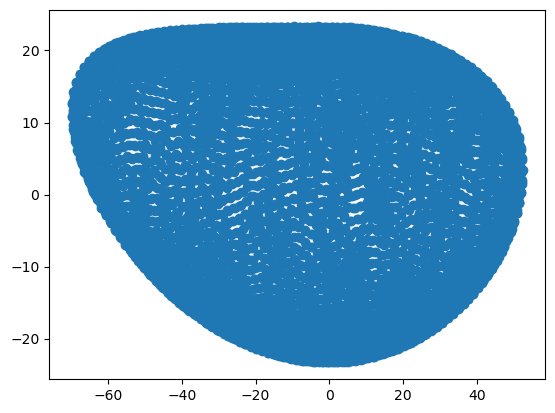

In [346]:
plt.scatter(sim_poss[0,:,0], sim_poss[0,:,2])

In [132]:
overlaps = np.load('overlaps_normal.npy')
np.save('avg_compared_dirs_normal.npy', avg_compared_dirs)

scale = int(sim_poss.shape[0]/100)


980


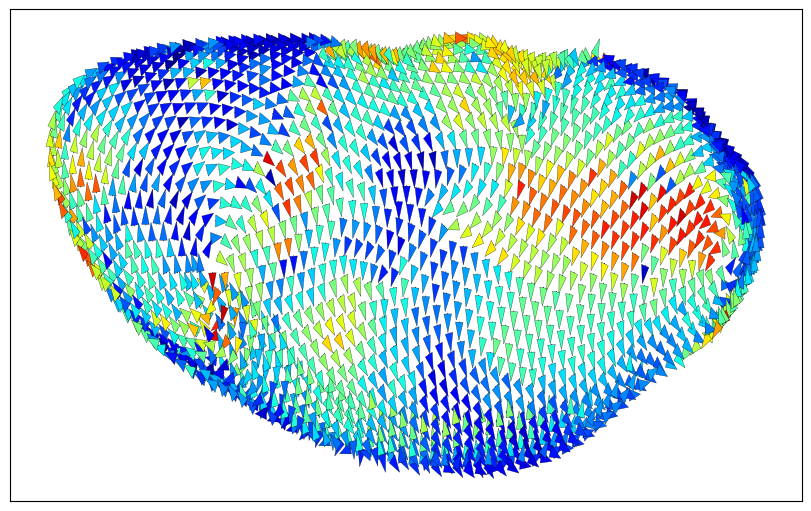

In [191]:
import numpy.ma as ma

import matplotlib
# plottable = overlap.mean(axis = 1)
iiis = list([0,5,10,15,20,25,30,40])


# for ind in range(len(iiis)):
def make_inset_plot(iii, ax):
    over = overlaps[iii]
    
    sim_t = iii*scale
    print(sim_t)
    stas_t = iii+1

    # plt.colorbar()
    
    sim_arrows = sim_dirs[sim_t]
    stas_arrows = stas_dirs[stas_t]

    # green to red
    cmap = matplotlib.colormaps.get_cmap('jet')

    # ax.scatter(sim_poss[sim_t][:,0][sim_poss[sim_t][:,1]>0], sim_poss[sim_t][:,2][sim_poss[sim_t][:,1]>0], c = over[sim_poss[sim_t][:,1]>0], cmap = cmap, s = 20)

    for cell_id, (pos, dir, stasdir) in enumerate(zip(sim_poss[sim_t], sim_dirs[sim_t], avg_compared_dirs[ind])):
        xx, yy, zz = pos

        # if zz < 0:
        #     if yy > -5:
        #         continue
        # else:
        if yy < 0:
            continue 
        if properties[cell_id] == 2:
            continue

        # ax.arrow(pos[0], pos[2], dir[0]*0.1, dir[2]*0.1,  alpha = 1., head_width = 1.3, facecolor =  cmap(over[cell_id]/np.pi), edgecolor = "black", linewidth = 0.2)
        # make stream plot

        # ax.arrow(pos[0], pos[2], stasdir[0], stasdir[2], color = "black", alpha = 1., head_width = 0.7)

    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])

    colorbar = plt.cm.ScalarMappable(cmap = cmap)
    return colorbar

fig, ax = plt.subplots(1, 1, figsize=(8,5), constrained_layout=True, sharex=True, sharey=True)

# for i, ax in enumerate(axs.flatten()):
#     make_inset_plot(i, ax)    

make_inset_plot(35,ax)

56
336
980


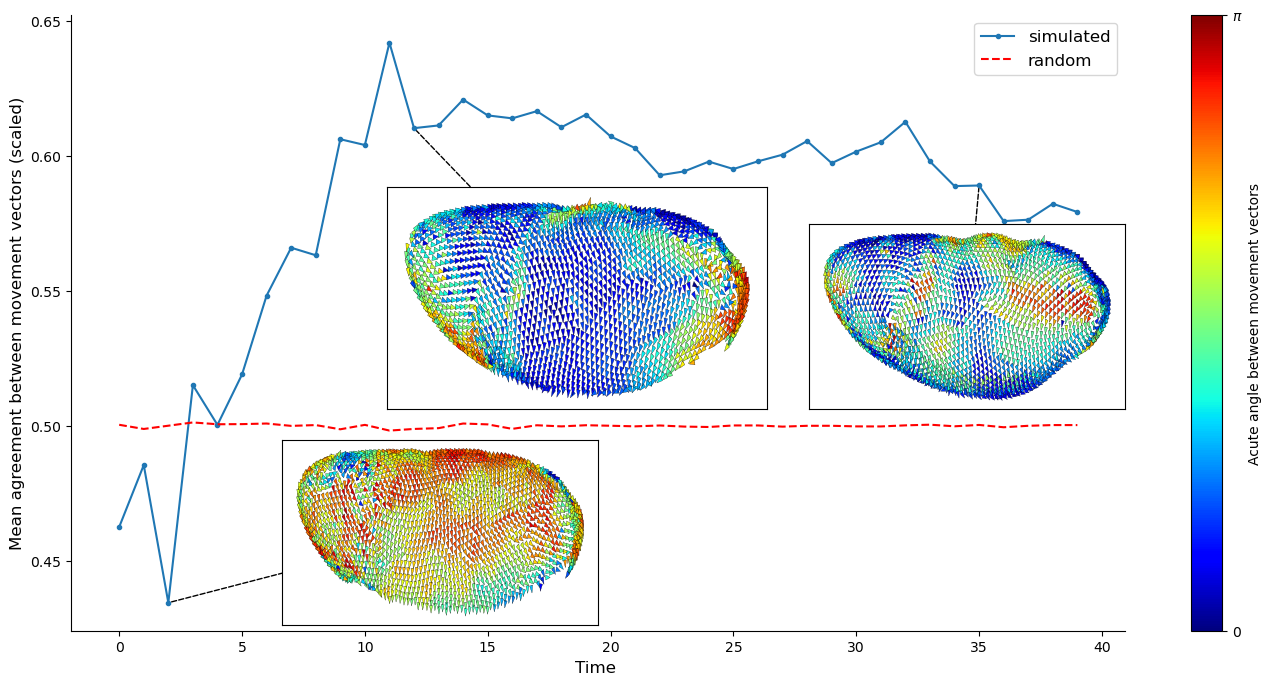

In [196]:
ymean = 1-np.array([np.mean(o[~np.isnan(o)]) for o in overlaps])/np.pi
yerr = [np.std(o[~np.isnan(o)]) for o in overlaps]

fig, ax = plt.subplots(1, 1, figsize=(17,8))

ax.plot(np.array(ymean), '.-', label = 'simulated')


y = 1-np.array([np.mean(r[~np.isnan(r)]) for r in random_angles])/np.pi

ax.plot(y, color = 'red', linestyle = '--', label = 'random')

yerr = [np.std(r[~np.isnan(r)]) for r in random_angles]
# plt.errorbar(list(range(len(y))), y, yerr = yerr, color = "red")


# make inset with
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

import seaborn as sns

fontsize = 12
# sns.set_style('white')

xposs = [0.2, 0.3, 0.7]
yposs = [0.01, 0.36, 0.36]
sizes = [1., 1.2, 1.]
for i in range(len([0, 10, 35])):
    iii = [2,12,35][i]

    axins = ax.inset_axes([xposs[i], yposs[i], 0.3*sizes[i], 0.3*sizes[i]],)
    colorbar = make_inset_plot(iii, axins)
    cp1 = ConnectionPatch(xyA=(0.5, 0.5), xyB=(iii,ymean[iii]), coordsA="axes fraction", coordsB="data",
                        axesA=axins, axesB=ax, color="black", linestyle='--')
    # cp2 = ConnectionPatch(xyA=(0.5, 0.5), xyB=(0.5, 0.5), coordsA="axes fraction", coordsB="axes fraction",
    #                     axesA=axins, axesB=ax, color="black", linestyle='--')
    
    ax.add_artist(cp1)
    # ax.add_artist(cp2)

sns.despine()
cbat = plt.colorbar(colorbar, ax = ax, label = 'Acute angle between movement vectors', )
cbat.set_ticks([0, 1.])
cbat.set_ticklabels(['0', '$\pi$'])

# cbat.ax.set_yticklabels(['0', '$\pi/2$', '$\pi$'])
# cbat.ax.set_label('Angle between movement vectors', size=fontsize)
# cbat.ax.tick_params(labelsize=fontsize) 
plt.xlabel('Time ', fontsize = fontsize)
plt.ylabel('Mean agreement between movement vectors (scaled)', fontsize = fontsize)
plt.legend(fontsize = fontsize)


# save as pdf
plt.savefig('../../Figures/movement_vectors_normal.pdf', bbox_inches='tight')

plt.show()

In [168]:
matplotlib.rc_file_defaults()